In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
np.random.seed(42)
%matplotlib inline


#### Part 1: An algorithm to generate random points (in 2D) distributed uniformly inside the ellipse

In [3]:
# Selecting random points uniformly distributed in a unit circle, and transforming them into points of required ellipse,
# thus getting uniformly distributed points in the ellipse.
# To get uniform distribution of points in unit circle, we use radial coordinates.
# After transforming the radial coordinates to cartesian coordinates, we will scale the x and y coordinates by half the length of major and minor axes respectively.

def uniformRandomPointGenerator_ellipse():
    r = np.sqrt(np.random.random()) # Proof for using sqrt, check data/Q1_a_1
    theta = np.random.random()*2*np.pi
    #We have our r and theta, now we convert it to cartesian coordinate system and scale the coordinates to
    # that of the ellipse we require(L(major axis)=2, L(minor axis)=1)
    x = r*np.cos(theta)*1
    y = r*np.sin(theta)*0.5
    return (x,y)


#### Part 2: Using the algorithm above to sample $ 10^7 $ points and plot a histogram

In [4]:
sample_ellipse = [] #The list in which our sample data will be stored
for i in range(1, int(1e7)): # Generating 10^7 random points
    point = uniformRandomPointGenerator_ellipse()
    sample_ellipse.append(point)
    
sample_ellipse = np.array(sample_ellipse)
sample_ellipse

array([[ 0.58288649, -0.09325162],
       [-0.69638201, -0.24851863],
       [ 0.21997268,  0.16403556],
       ...,
       [ 0.34293377,  0.192313  ],
       [-0.79393705, -0.09216527],
       [ 0.7830952 ,  0.10363593]])

##### Plotting the Histogram

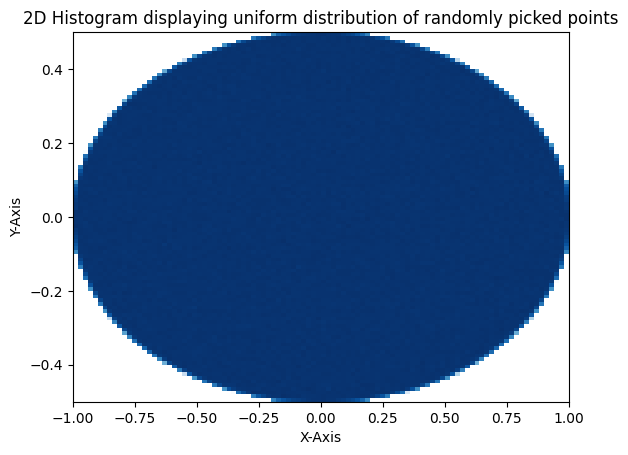

In [5]:
plt.title("2D Histogram displaying uniform distribution of randomly picked points")
plt.hist2d(x=sample_ellipse[:,0],y=sample_ellipse[:,1], bins=100, norm = colors.LogNorm() ,cmap="Blues")

plt.xlabel("X-Axis")
plt.xlim(-1,1)

plt.ylabel("Y-Axis")
plt.ylim(-0.5,0.5)

plt.show()

#### Part 3: An algorithm to generate random points uniformly distributed over a triangle

In [6]:
# We select random points in a right angled triangle with vertices (0,0), (0,1) and(1,1).
# Then we multiply the points with a transformation matrix to get uniformly distributed points in the desired triangle.

A = np.array([[2*np.pi/3, np.pi/3],[-np.e, np.e]]) #Transformation Matrix. How we got this:-look at data/Q1_c_1

def uniformRandomPointGenerator_triangle():
    x = np.random.random()
    y = np.random.random()
    if x-y >0:
        x, y = y, x
    point = np.array([x, y])
    point = np.matmul(A, point)
    return point

#### Part 4: Using the above algorithm to sample $ 10^7 $ points and plot a histogram

In [7]:
sample_triangle = []

for i in range(1, int(1e7)): # Generating 10^5 random points
    point = uniformRandomPointGenerator_triangle()
    sample_triangle.append(point)
    
sample_triangle = np.array(sample_triangle)

##### Plotting the Histogram 

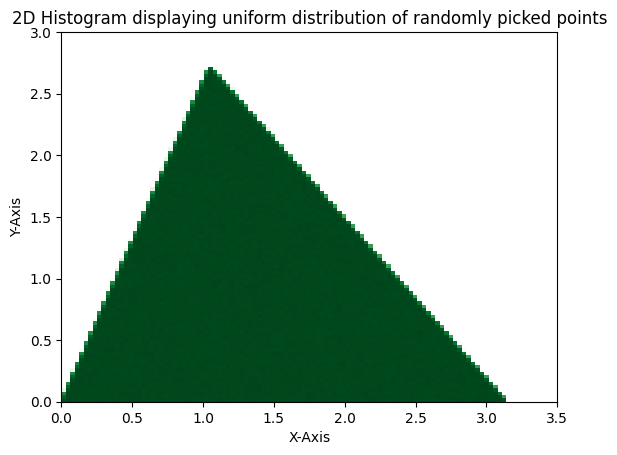

In [8]:
plt.title("2D Histogram displaying uniform distribution of randomly picked points")
plt.hist2d(x=sample_triangle[:,0],y=sample_triangle[:,1], bins=100, norm = colors.LogNorm() ,cmap="Greens")

plt.xlabel("X-Axis")
plt.xlim(0,3.5)

plt.ylabel("Y-Axis")
plt.ylim(0,3)

plt.show()